In [2]:
# Shadia's blank canvas

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from scipy.stats import linregress
from pprint import pprint

covid_clean_CA_TX = "../Resources/covid_clean_CA_TX.csv"

In [83]:
covid_clean_CA_TX_df = pd.read_csv(covid_clean_CA_TX, encoding="ISO-8859-1")

covid_clean_CA_TX_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144


In [84]:
# Create a dataframe of States (CA and TX), County Name, Population, and Total Covid Cases
covid_clean_CA_TX_totalinfect = covid_clean_CA_TX_df[["State", "County Name", "population", "10/30/2020"]]
covid_clean_CA_TX_totalinfect = covid_clean_CA_TX_totalinfect.rename(columns={"10/30/2020":"Total Covid Cases"})

# Sort data by population size to identify lowe and upper limit for population bins
covid_clean_CA_TX_totalinfect = covid_clean_CA_TX_totalinfect.sort_values("population", ascending=True)
covid_clean_CA_TX_totalinfect

,State,County Name,population,Total Covid Cases
0,CA,Grand Princess Cruise Ship,0,21
209,TX,Loving County,169,0
193,TX,King County,272,1
189,TX,Kenedy County,404,11
75,TX,Borden County,654,2
...,...,...,...,...
115,TX,Dallas County,2635516,95402
30,CA,Orange County,3175692,59718
37,CA,San Diego County,3338330,56369
159,TX,Harris County,4713325,160984


In [85]:
# Create a dataframe of grouped bins of population
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1250000"]
covid_clean_CA_TX_totalinfect["population"] = pd.cut(covid_clean_CA_TX_totalinfect["population"], bins, labels=population_sizes, include_lowest=True)
covid_clean_CA_TX_totalinfect = covid_clean_CA_TX_totalinfect.dropna().set_index("State")
covid_clean_CA_TX_totalinfect = covid_clean_CA_TX_totalinfect[["population", "County Name", "Total Covid Cases"]] 
covid_clean_CA_TX_totalinfect 



,population,County Name,Total Covid Cases
State,,,
TX,100-4999,Loving County,0
TX,100-4999,King County,1
TX,100-4999,Kenedy County,11
TX,100-4999,Borden County,2
TX,100-4999,McMullen County,25
...,...,...,...
TX,750000-1250000,Denton County,14769
CA,750000-1250000,Kern County,34308
CA,750000-1250000,Fresno County,31321


In [89]:
# Total Covid cases by population size county in CA

covid_clean_CA_TX_totalinfect_CA = covid_clean_CA_TX_totalinfect.loc["CA"]
covid_clean_CA_TX_totalinfect_CA = covid_clean_CA_TX_totalinfect_CA.reset_index()
covid_clean_CA_TX_totalinfect_CA = covid_clean_CA_TX_totalinfect_CA.drop(columns=["State","County Name"])
covid_clean_CA_TX_totalinfect_CA = covid_clean_CA_TX_totalinfect_CA.groupby("population").sum()
covid_clean_CA_TX_totalinfect_CA = covid_clean_CA_TX_totalinfect_CA.rename(columns={"Total Covid Cases": "CA Covid Cases"})
covid_clean_CA_TX_totalinfect_CA

,CA Covid Cases
population,
100-4999,9
5000-24999,1220
25000-49999,2537
50000-249999,47314
250000-499999,85121
500000-749999,17872
750000-1250000,144892


In [88]:
# Total Covid cases by population size county in TX

covid_clean_CA_TX_totalinfect_TX = covid_clean_CA_TX_totalinfect.loc["TX"]
covid_clean_CA_TX_totalinfect_TX = covid_clean_CA_TX_totalinfect_TX.reset_index()
covid_clean_CA_TX_totalinfect_TX = covid_clean_CA_TX_totalinfect_TX.drop(columns=["State","County Name"])
covid_clean_CA_TX_totalinfect_TX = covid_clean_CA_TX_totalinfect_TX.groupby("population").sum()
covid_clean_CA_TX_totalinfect_TX = covid_clean_CA_TX_totalinfect_TX.rename(columns={"Total Covid Cases": "TX Covid Cases"})
covid_clean_CA_TX_totalinfect_TX

,TX Covid Cases
population,
100-4999,2912
5000-24999,40192
25000-49999,34379
50000-249999,133399
250000-499999,125007
500000-749999,22874
750000-1250000,133479


In [109]:
# Total Covid cases by population size county in TX and CA

TX_CA_pop_bins = pd.concat([covid_clean_CA_TX_totalinfect_TX,covid_clean_CA_TX_totalinfect_CA], axis=1)
TX_CA_pop_bins

,TX Covid Cases,CA Covid Cases
population,,
100-4999,2912,9
5000-24999,40192,1220
25000-49999,34379,2537
50000-249999,133399,47314
250000-499999,125007,85121
500000-749999,22874,17872
750000-1250000,133479,144892


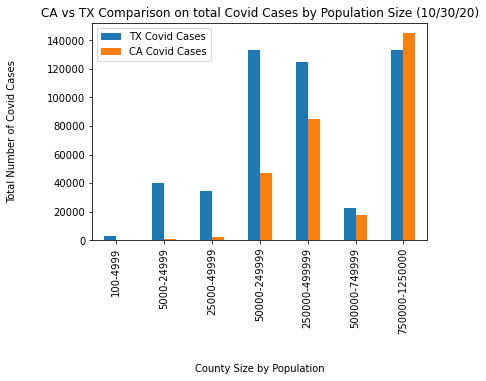

In [110]:
# Comparison Graph on Total Covid Cases by county population size

TX_CA_pop_bins = TX_CA_pop_bins.plot(kind="bar")
TX_CA_pop_bins.set_ylabel("Total Number of Covid Cases", labelpad=30)
TX_CA_pop_bins.set_xlabel("County Size by Population", labelpad=30)
TX_CA_pop_bins.set_title("CA vs TX Comparison on total Covid Cases by Population Size (10/30/20)")
plt.savefig("../Images/Total_Infection_Comparison.png")